In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    
def plot_violin_graph(list_of_data, title):
    # Create a figure instance
    label = ["Cossine", "MSD", "Pearson", "Pearson Baseline"]
    fig = plt.figure()
  
    # Create an axes instance
    ax = fig.gca()
    ax.set_title(title)
    set_axis_style(ax, label)
    # Create the violinplot
    violinplot = ax.violinplot(list_of_data)
    plt.show()
    

In [3]:
cossine_fold_0 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_0.parquet")
cossine_fold_1 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_1.parquet")
cossine_fold_2 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_2.parquet")
cossine_fold_3 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_3.parquet")
cossine_fold_4 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_4.parquet")

cossine = pd.concat([cossine_fold_0, cossine_fold_1, cossine_fold_2, cossine_fold_3, cossine_fold_4])

In [4]:
msd_fold_0 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd_0.parquet")
msd_fold_1 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd_1.parquet")
msd_fold_2 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd_2.parquet")
msd_fold_3 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd_3.parquet")
msd_fold_4 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd_4.parquet")

msd = pd.concat([msd_fold_0, msd_fold_1, msd_fold_2, msd_fold_3, msd_fold_4])

In [5]:
pearson_baseline_fold_0 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_baseline_0.parquet")
pearson_baseline_fold_1 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_baseline_1.parquet")
pearson_baseline_fold_2 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_baseline_2.parquet")
pearson_baseline_fold_3 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_baseline_3.parquet")
pearson_baseline_fold_4 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_baseline_4.parquet")

pearson_baseline = pd.concat([pearson_baseline_fold_0, pearson_baseline_fold_1, pearson_baseline_fold_2, pearson_baseline_fold_3, pearson_baseline_fold_4])

In [6]:
pearson_fold_0 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_0.parquet")
pearson_fold_1 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_1.parquet")
pearson_fold_2 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_2.parquet")
pearson_fold_3 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_3.parquet")
pearson_fold_4 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_4.parquet")

pearson = pd.concat([pearson_fold_0, pearson_fold_1, pearson_fold_2, pearson_fold_3, pearson_fold_4])

In [7]:
est_list = [
    cossine["est"].to_list(),
    msd["est"].to_list(),
    pearson["est"].to_list(),
    pearson_baseline["est"].to_list(),
]

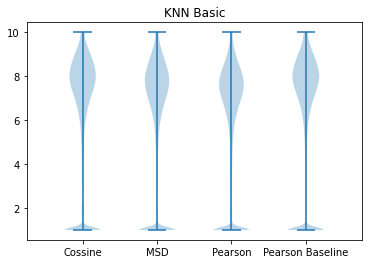

In [8]:
plot_violin_graph(est_list, title="KNN Basic")

In [9]:
def round_est_values(df):
    round_actual = np.round(df["est"], decimals=0)
    round_actual = round_actual.reset_index()
    df = df.reset_index()[["index", "actual", "details"]]
    df = df.merge(round_actual, on="index", how="left")
    df = df.set_index("index")
    grouped = df.groupby("est", as_index=False).count()
    return grouped

In [10]:
cossine_grouped = round_est_values(cossine)
print(cossine_grouped)

    est   actual  details
0   1.0  3594646  3594646
1   2.0   447285   447285
2   3.0   411320   411320
3   4.0   484945   484945
4   5.0   812830   812830
5   6.0  1947940  1947940
6   7.0  5041945  5041945
7   8.0  7912335  7912335
8   9.0  4856475  4856475
9  10.0   908255   908255


In [11]:
msd_grouped = round_est_values(msd)
print(msd_grouped)

    est   actual  details
0   1.0  3745366  3745366
1   2.0   426175   426175
2   3.0   434725   434725
3   4.0   542780   542780
4   5.0   952090   952090
5   6.0  2403525  2403525
6   7.0  5806200  5806200
7   8.0  7481530  7481530
8   9.0  3874225  3874225
9  10.0   751360   751360


In [12]:
pearson_baseline_grouped = round_est_values(pearson_baseline)
print(pearson_baseline_grouped)

    est   actual  details
0   1.0  3644455  3644455
1   2.0   369600   369600
2   3.0   359455   359455
3   4.0   437540   437540
4   5.0   746875   746875
5   6.0  1863640  1863640
6   7.0  5046080  5046080
7   8.0  8073811  8073811
8   9.0  4875600  4875600
9  10.0  1000920  1000920


In [13]:
pearson_grouped = round_est_values(pearson)
print(pearson_grouped)

    est   actual  details
0   1.0  3787495  3787495
1   2.0   437295   437295
2   3.0   438865   438865
3   4.0   561415   561415
4   5.0  1032655  1032655
5   6.0  2718725  2718725
6   7.0  6530681  6530681
7   8.0  7360305  7360305
8   9.0  2992505  2992505
9  10.0   558035   558035


In [14]:
cossine_grouped = cossine_grouped.rename(columns={"actual": "cossine"})
msd_grouped = msd_grouped.rename(columns={"actual": "msd"})
pearson_baseline_grouped = pearson_baseline_grouped.rename(columns={"actual": "pearson baseline"})
pearson_grouped = pearson_grouped.rename(columns={"actual": "pearson"})

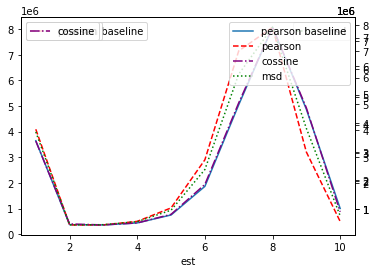

In [15]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()

cossine_grouped.plot(x="est", y=["cossine"], ax=ax2, ls="dashdot", color="purple")
msd_grouped.plot(x="est", y=["msd"], ax=ax3, ls="dotted", color="green")
pearson_baseline_grouped.plot(x="est", y=["pearson baseline"], ax=ax)
pearson_grouped.plot(x="est", y=["pearson"], ax=ax1, ls="dashed", color="red")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)